## Python versus R

### Pandas

```R
library("tidymodels")

linear_reg()
```

In [33]:
import pandas as pd

In [1]:
# from pandas import read_csv

In [ ]:
pd.read_csv()

In [2]:
# pd.read_csv()

### Plotnine 

https://plotnine.readthedocs.io/en/v0.12.4/

In [3]:
from plotnine import *  # frowned upon in Python
from plotnine.data import mtcars

In [4]:
mtcars

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


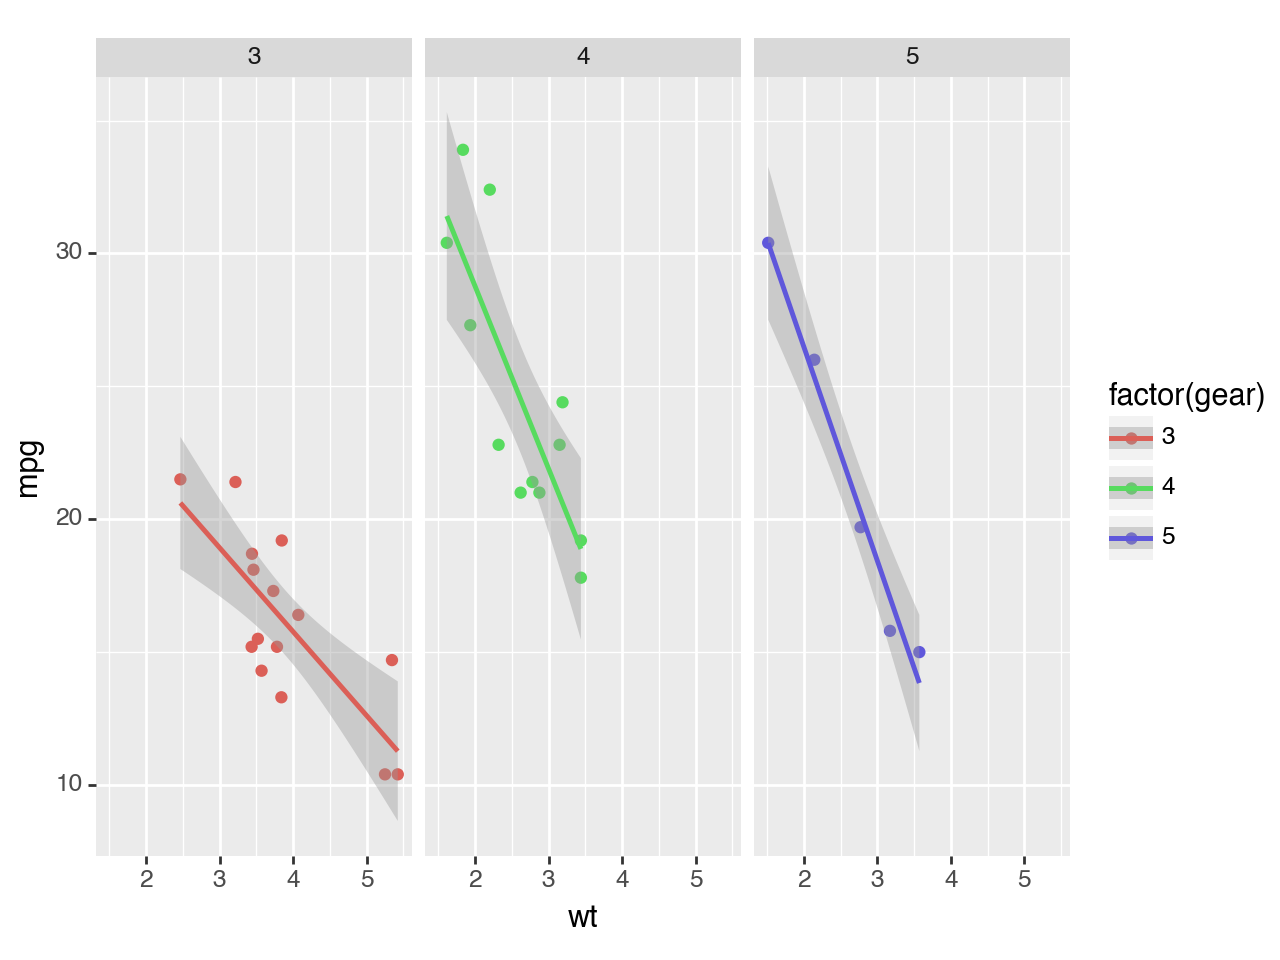

<Figure Size: (640 x 480)>

In [8]:
(
    ggplot(mtcars, aes(x = "wt", y = "mpg", color = "factor(gear)")) 
     + geom_point()
     + stat_smooth(method="lm")
     + facet_wrap("~gear")
)

### Altair

https://altair-viz.github.io/

In [10]:
from palmerpenguins import load_penguins

In [11]:
import altair as alt

In [16]:
penguins = load_penguins()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [15]:
# pipe-ing uses dots instead of |> 

alt.Chart(penguins).mark_point().encode(
    x = alt.X('bill_depth_mm', scale=alt.Scale(zero=False)),
    y = alt.Y('bill_length_mm', scale=alt.Scale(zero=False)),
    color = alt.Color('species'),
    tooltip = [alt.Tooltip('species'), alt.Tooltip('sex')]
)

alt.Chart(...)

## Scikit-Learn

In [8]:
penguins = load_penguins()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [17]:
penguins2 = (
    penguins
    .dropna()
    .pipe(lambda df_: df_[df_['species']=="Adelie"])
)

penguins2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


```R
mod = linear_reg() |> set_engine("lm")

mod_fit = mod |> fit(bill_length_mm ~ bill_depth_mm, data = penguins)
```

In [18]:
list_of_stuff = [1, 2, 5, 6]
list_of_stuff

[1, 2, 5, 6]

In [20]:
features = ['bill_depth_mm']
features

['bill_depth_mm']

In [21]:
outcome = ['bill_length_mm']

In [23]:
# in R: X = penguins2 |> select(bill_depth_mm)

X = penguins2[features] # capitalized
y = penguins2[['bill_length_mm']]

X.head()

,bill_depth_mm
0,18.7
1,17.4
2,18.0
4,19.3
5,20.6


In [25]:
from sklearn.linear_model import LinearRegression

In [30]:
mod = LinearRegression()

mod.fit(X, y)

mod

LinearRegression()

In [31]:
# in R: tidy(mod_fit)

mod.intercept_

array([23.3668186])

In [34]:
X_to_predict = pd.DataFrame(
    {"bill_depth_mm": [19]}
)

X_to_predict

,bill_depth_mm
0,19


In [35]:
# augment, predict
# in R: mod |> predict(new_data = penguins)

mod.predict(X_to_predict)

array([[39.37389114]])

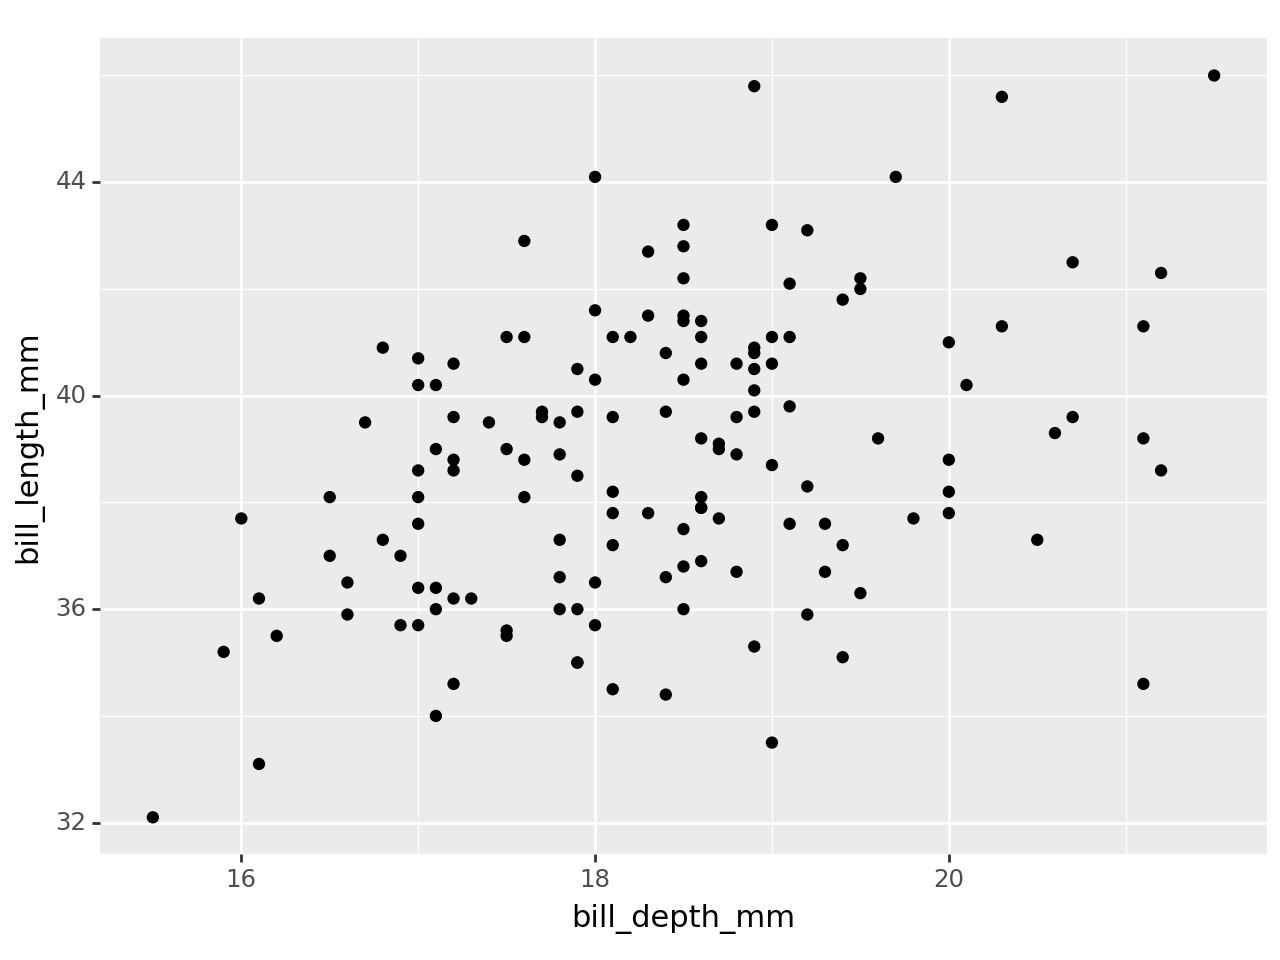

In [18]:
from plotnine import *

p = (
    ggplot(penguins2, aes(x = "bill_depth_mm", y = "bill_length_mm")) + geom_point()
)

p.draw()

### Transforming input data

In [37]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [38]:
features = ['bill_depth_mm', 'species']
features

['bill_depth_mm', 'species']

In [39]:
penguins_no_missing = penguins.dropna()

X = penguins_no_missing[features] # capitalized
y = penguins_no_missing[['bill_length_mm']]

X.head()

,bill_depth_mm,species
0,18.7,Adelie
1,17.4,Adelie
2,18.0,Adelie
4,19.3,Adelie
5,20.6,Adelie


In [40]:
ct = make_column_transformer(
    ['passthrough', ['bill_depth_mm']],
    [OneHotEncoder(drop=['Adelie']), ['species']]
)

In [41]:
ct

ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                 ['bill_depth_mm']),
                                ('onehotencoder',
                                 OneHotEncoder(drop=['Adelie']), ['species'])])

In [24]:
ct.fit_transform(X)[:5]

# try fit then transform

array([[18.7,  0. ,  0. ],
       [17.4,  0. ,  0. ],
       [18. ,  0. ,  0. ],
       [19.3,  0. ,  0. ],
       [20.6,  0. ,  0. ]])

### Pipelines

In [46]:
from sklearn.pipeline import make_pipeline

In [47]:
pl = make_pipeline(
    ct,
    LinearRegression()
)

In [48]:
pl.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  ['bill_depth_mm']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop=['Adelie']),
                                                  ['species'])])),
                ('linearregression', LinearRegression())])

#### Extract steps from pipeline

In [30]:
pl.named_steps

{'columntransformer': ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                  ['bill_depth_mm']),
                                 ('onehotencoder',
                                  OneHotEncoder(drop=['Adelie']), ['species'])]),
 'linearregression': LinearRegression()}

In [50]:
mod = pl['linearregression']

In [52]:
mod.intercept_

array([13.10913271])

In [28]:
X_to_predict = pd.DataFrame(
    {"bill_depth_mm": [19],
     "species": ["Adelie"]}
)

In [29]:
pl.predict(X_to_predict)

array([[39.73882841]])

In [31]:
mod_from_pipeline = pl['linearregression']
mod_from_pipeline.intercept_

array([13.10913271])